# Code to replicate the results of the paper ***Impact of the Paris Agreement and COVID-19 on Volatility Persistence of Brown and Green Stocks: A Multiverse Analysis*** by **O. Kvist** and **J. E. Vera-Valdés**.

### Import libraries

In [1]:
using Pkg
Pkg.activate(pwd())

  Activating project at `c:\Users\eduar\OneDrive - Aalborg Universitet\Research\CLIMATE\LM_Paris_Green_Julia`


In [2]:
using LongMemory, MarketData, StatsPlots, DataFrames, TimeSeries, CSV

### Defining the markets and dates

In [3]:
markets = ["TSLA"]

1-element Vector{String}:
 "TSLA"

In [4]:
fechas = [Date(2013, 1, 1) Date(2016, 11, 4) Date(2020, 1, 29) Date(2023, 2, 28)]

1×4 Matrix{Date}:
 2013-01-01  2016-11-04  …  2023-02-28

### Importing the data

In [5]:
actual = yahoo(markets[1], YahooOpt(period1=DateTime(fechas[1]))).AdjClose

2767×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2013-01-02 to 2023-12-28
┌────────────┬──────────┐
│            │ AdjClose │
├────────────┼──────────┤
│ 2013-01-02 │  2.35733 │
│ 2013-01-03 │    2.318 │
│ 2013-01-04 │  2.29333 │
│ 2013-01-07 │  2.28933 │
│ 2013-01-08 │  2.24533 │
│ 2013-01-09 │  2.24267 │
│ 2013-01-10 │  2.23533 │
│ 2013-01-11 │    2.194 │
│     ⋮      │    ⋮     │
│ 2023-12-19 │   257.22 │
│ 2023-12-20 │   247.14 │
│ 2023-12-21 │    254.5 │
│ 2023-12-22 │   252.54 │
│ 2023-12-26 │   256.61 │
│ 2023-12-27 │   261.44 │
│ 2023-12-28 │   253.18 │
└────────────┴──────────┘
        2752 rows omitted

In [6]:
lt = 100 .* diff(log.(actual))

2766×1 TimeArray{Float64, 1, Date, Vector{Float64}} 2013-01-03 to 2023-12-28
┌────────────┬───────────┐
│            │ AdjClose  │
├────────────┼───────────┤
│ 2013-01-03 │  -1.68262 │
│ 2013-01-04 │  -1.06985 │
│ 2013-01-07 │ -0.174571 │
│ 2013-01-08 │  -1.94067 │
│ 2013-01-09 │ -0.118806 │
│ 2013-01-10 │ -0.327557 │
│ 2013-01-11 │  -1.86638 │
│ 2013-01-14 │   1.05788 │
│     ⋮      │     ⋮     │
│ 2023-12-19 │   2.01852 │
│ 2023-12-20 │  -3.99768 │
│ 2023-12-21 │   2.93459 │
│ 2023-12-22 │ -0.773121 │
│ 2023-12-26 │   1.59877 │
│ 2023-12-27 │   1.86475 │
│ 2023-12-28 │  -3.21041 │
└────────────┴───────────┘
         2751 rows omitted

### Defining the sample

In [7]:
prepa_lt = to(from(lt, Date(fechas[1])), fechas[2])
length(prepa_lt)

969

In [8]:
postpa_lt = to(from(lt, Date(fechas[2])), fechas[3])
length(postpa_lt)

812

In [9]:
covid_lt = to(from(lt, Date(fechas[3])), fechas[4])
length(covid_lt)

777

In [10]:
whittle_est_variance(length(prepa_lt); m=0.8)

0.0010204081632653062

In [11]:
whittle_est_variance(length(postpa_lt); m=0.8)

0.0011737089201877935

In [12]:
whittle_est_variance(length(covid_lt); m=0.8)

0.0012195121951219512

In [31]:
gph_est_variance(length(prepa_lt); m=0.8)

0.001678504149845129

In [13]:
gph_est_variance(length(postpa_lt); m=0.8)

0.0019306737873805474

In [14]:
gph_est_variance(length(covid_lt); m=0.8)

0.002006017154692959

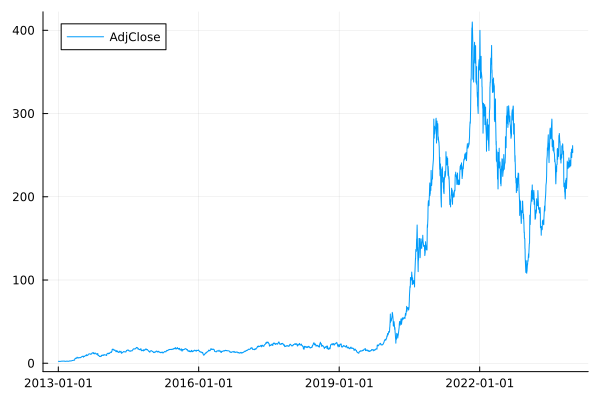

In [18]:
plot(actual)

In [17]:
include("LM_Paris_Functions.jl")

choose_options_bdws (generic function with 1 method)

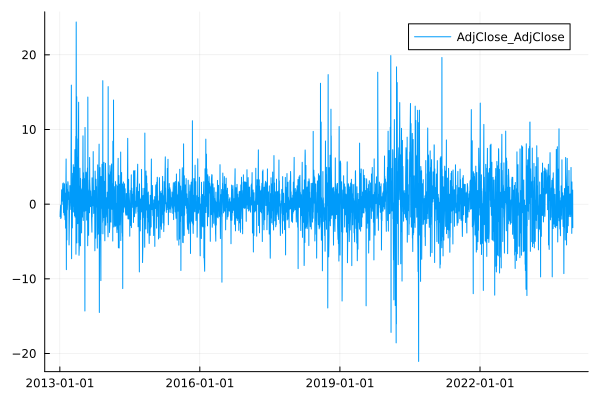

In [19]:
plot(plain_returns(actual))

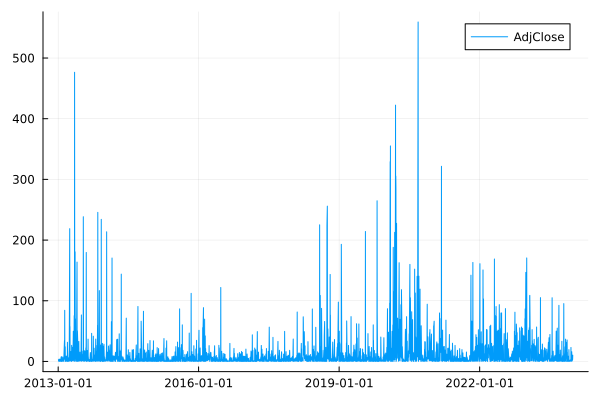

In [20]:
plot(log_returns(actual).^2)

In [21]:
exact_whittle_est(values(plain_returns(actual)).^2)

0.21400251263257009

In [22]:
exact_whittle_est_variance(values(plain_returns(actual)).^2; m=0.8)

0.0004409171075837742